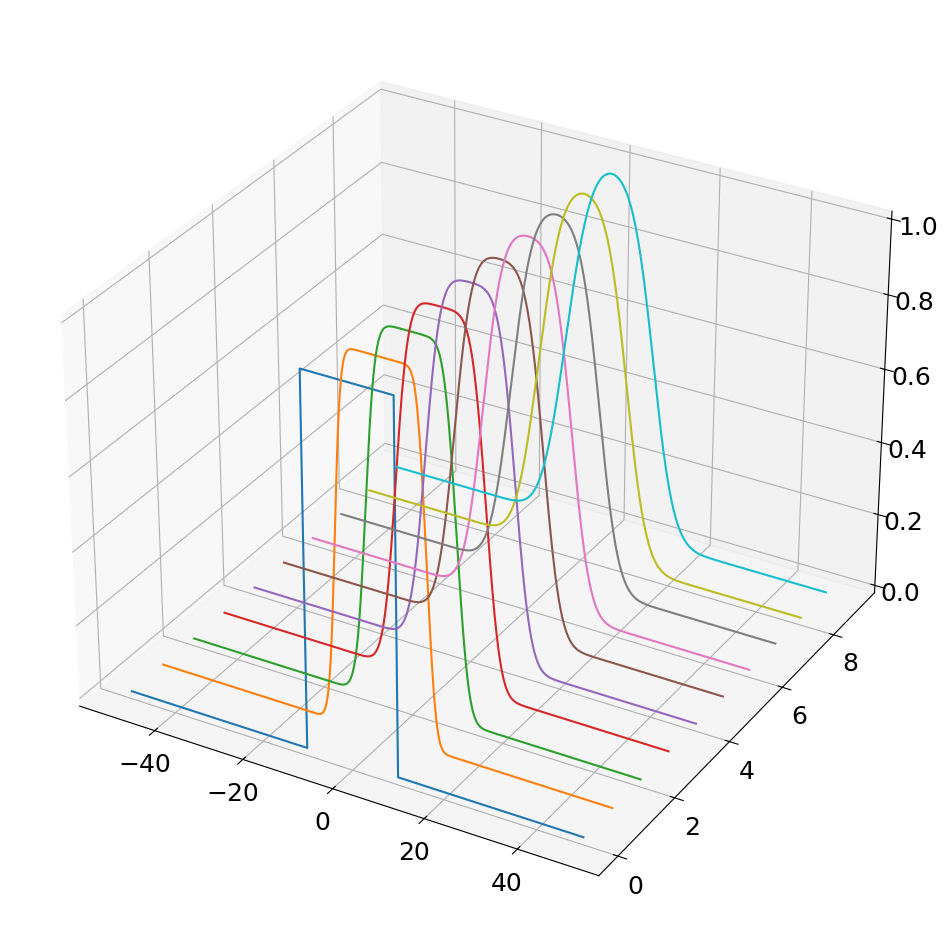

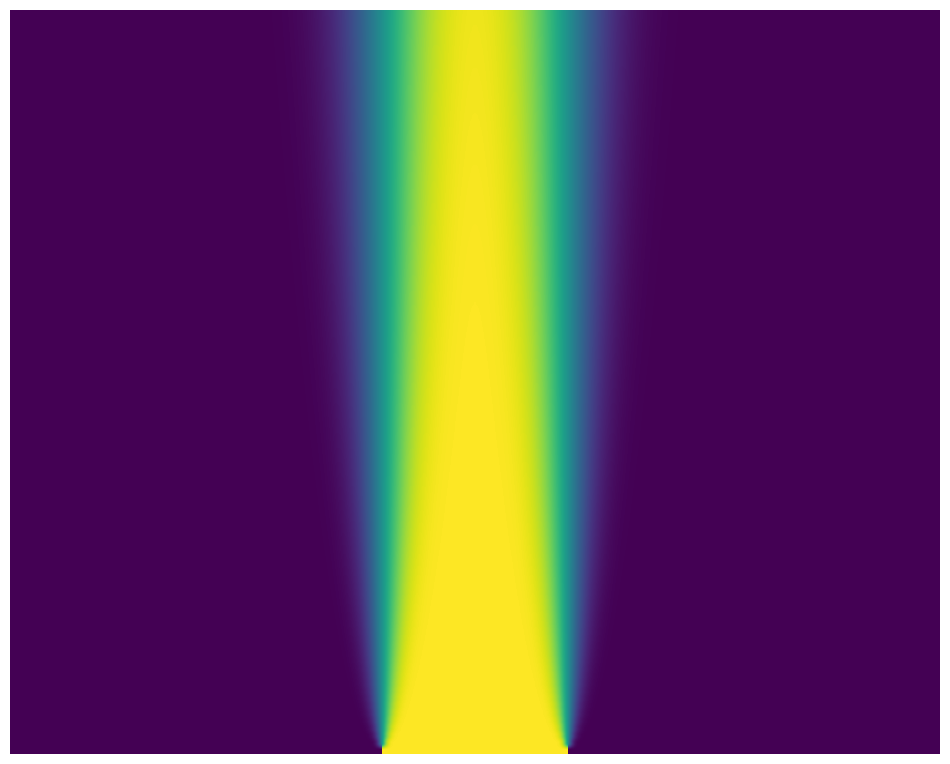

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

a = 1    # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)

# SciPy's odeint function doesn't play well with complex numbers, so we recast 
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real    

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

In [3]:
u0hat.real

array([ 2.00000000e+02, -1.87097241e+02,  1.51363354e+02, -1.00907243e+02,
        4.67720021e+01,  6.66133815e-16, -3.11792829e+01,  4.32402698e+01,
       -3.78333685e+01,  2.07831107e+01, -2.33723817e-15, -1.70021247e+01,
        2.52156052e+01, -2.32740276e+01,  1.33555141e+01, -1.67542858e-15,
       -1.16837660e+01,  1.77907535e+01, -1.68004409e+01,  9.83555782e+00,
       -3.97668095e-16, -8.89649193e+00,  1.37385682e+01, -1.31392893e+01,
        7.78096578e+00, -5.99652756e-16, -7.18006058e+00,  1.11853444e+01,
       -1.07839096e+01,  6.43379006e+00,  3.28317666e-16, -6.01632131e+00,
        9.42844240e+00, -9.14076759e+00,  5.48193428e+00,  1.81600344e-15,
       -5.17498479e+00,  8.14502741e+00, -7.92871526e+00,  4.77335132e+00,
        0.00000000e+00, -4.53809778e+00,  7.16599532e+00, -6.99737085e+00,
        4.22510625e+00,  8.10745427e-16, -4.03899096e+00,  6.39420099e+00,
       -6.25901146e+00,  3.78811502e+00, -2.01945010e-15, -3.63713968e+00,
        5.76986260e+00, -